best value of k is: 19
[1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
KNN final accuracy score : 0.73
KNN Confusion Matrix:
[[10 22]
 [ 5 63]]
SVC!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
best value of c is: 1
SVC_accuracy: 0.68
SVC Confusion Matrix:
[[ 0 32]
 [ 0 68]]


,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,age,class
0,6.0,1,-0.745131,4,3,3,2.766456,1
1,48.0,3,0.949817,2,0,1,-1.191404,0
2,12.0,1,-0.416562,2,1,1,1.183312,1
3,42.0,3,1.634247,2,1,1,0.831502,1
4,24.0,2,0.566664,2,0,2,1.535122,0
...,...,...,...,...,...,...,...,...
995,12.0,3,-0.544162,2,1,2,-0.399832,1
996,30.0,3,0.207612,2,0,3,0.391740,1
997,12.0,3,-0.874503,2,3,3,0.215835,1
998,45.0,3,-0.505528,2,0,3,-1.103451,0


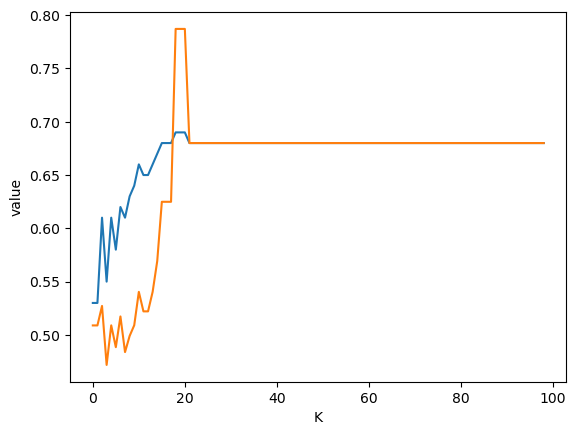

In [6]:

#Read the dataset into a Pandas DataFrame!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC


data = arff.loadarff('dataset_31_credit-g.arff')
df = pd.DataFrame(data[0])

#print("num tuples:" , len(df[['employment','savings_status','checking_status']] ))


#Does the dataset include any missing values? If so, drop them!
#print("missing values")
#print(df.isna().sum())#no missing values



#Feature Selection
#Choose the features you think are relevant to our analysis! There are A LOT of features in this dataset,
#but we have to make our model's training time reasonable.
#You MUST include at least four (4) numeric features and at least three (3) nominal features. 
#You can choose more if you prefer.
df = df.drop(['checking_status', 'purpose', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],axis = 1)


#Preprocessing
#Perform any needed pre-processing on the chosen features, includes:
#Scaling
df[['credit_amount','age']]=StandardScaler().fit_transform(df[['credit_amount','age']].values)

#Encoding


df[['credit_history','savings_status',
    'employment','installment_commitment','class']] = df[['credit_history','savings_status',
                                                          'employment','installment_commitment','class']].apply(lambda col: LabelEncoder().fit_transform(col))



#Note:
#Use only the preprocessing steps you think are useful.
#Splitting the Data
#Split your data as follows:
#80% training set
#10% validation set
#10% test set

y = df["class"].values
X = df[['credit_history','savings_status','credit_amount','employment','installment_commitment','age','duration']].values


X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=1)


#Training Classifiers
#Use the KNN-classifier model to train your data.
#Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.
#Note:
#choosing the best k is an example of hyper-parameter tuning.

accuracy = []
Precision = []
#Recall = [] same values as accuracy

for k in range(1,100):
    
    model = KNeighborsClassifier(n_neighbors=k,weights='distance',p=1).fit(X_val, y_val)
    
    y_pred= model.predict(X_test)

    accuracy.append(model.score(X_test, y_test))
    Precision.append(precision_score(y_test, y_pred, average='weighted',zero_division=np.nan))
    #Recall.append(recall_score(y_test, y_pred, average='weighted'))
    
#print("accuracy scores",accuracy)
#print(Precision)    
#print(Recall)



plt.plot(accuracy)
plt.plot(Precision)
#plt.plot(Recall)
plt.xlabel('K')
plt.ylabel('value')


best_k_value = accuracy.index(max(accuracy))+1

print("best value of k is:",best_k_value)


f_model =  KNeighborsClassifier(n_neighbors=best_k_value,weights='distance',p=1).fit(X_train, y_train)
y_f_pred= f_model.predict(X_test)
print(y_f_pred)
#Classification Metrics
#Print the accuracy score of your final classifier.
accuracy_score = f_model.score(X_test, y_test)
print("KNN final accuracy score :",accuracy_score)


#print the confusion matrix.
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_f_pred))


#Challenge Yourself (Optional)
#Choose another model (other than KNN) and repeat step 6.






print("SVC!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

SVC_accuracy=[]

for c in range(1,5):
    
    model_temp = SVC(kernel = "linear", C= c, gamma = "auto", random_state = 0).fit(X_val, y_val)
    
    SVC_accuracy.append(model_temp.score(X_test, y_test))
    
best_c_value = SVC_accuracy.index(max(SVC_accuracy))+1

print("best value of c is:",best_c_value)    
    
    
model2 = SVC(kernel = "linear", C= best_c_value, gamma = "auto", random_state = 0).fit(X_train,y_train)

    
print("SVC_accuracy:",model2.score(X_test,y_test))
    
y_pred2 = model.predict(X_test)
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))


df

In [12]:
df2 = pd.DataFrame(data[0])
df2

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


In [ ]:
'credit_history','savings_status',credit_amount,'employment',dinstallment_commitment,age,'class']